<a href="https://colab.research.google.com/github/VaideswarReddy/Credit_card_default_prediction/blob/main/Vaideswar_Reddy_Team_3_Capstone_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
df = pd.read_excel('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 2/Copy of default of credit card clients.xls',header = 1)

In [27]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [28]:
df = df.rename(columns={'LIMIT_BAL':'credit_limit','SEX':'gender','PAY_0':'pp_sep','PAY_2':'pp_aug','PAY_3':'pp_july','PAY_4':'pp_june','PAY_5':'pp_may','PAY_6':'pp_april','BILL_AMT1':'sep_bill','BILL_AMT2':'aug_bill','BILL_AMT3':'july_bill','BILL_AMT4':'june_bill','BILL_AMT5':'may_bill','BILL_AMT6':'april_bill','PAY_AMT1':'sep_paid_amt','PAY_AMT2':'aug_paid_amt','PAY_AMT3':'july_paid_amt','PAY_AMT4':'june_paid_amt','PAY_AMT5':'may_paid_amt','PAY_AMT6':'april_paid_amt'})

In [29]:
df.head()

,ID,credit_limit,gender,EDUCATION,MARRIAGE,AGE,pp_sep,pp_aug,pp_july,pp_june,pp_may,pp_april,sep_bill,aug_bill,july_bill,june_bill,may_bill,april_bill,sep_paid_amt,aug_paid_amt,july_paid_amt,june_paid_amt,may_paid_amt,april_paid_amt,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [30]:
df.credit_limit.value_counts()

50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
800000        2
760000        1
690000        1
1000000       1
327680        1
Name: credit_limit, Length: 81, dtype: int64

In [38]:
df.gender.value_counts()

2    18112
1    11888
Name: gender, dtype: int64

In [33]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [34]:
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [35]:
df.AGE.value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
71       3
72       3
75       3
74       1
79       1
Name: AGE, dtype: int64

In [39]:
df.pp_sep.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: pp_sep, dtype: int64

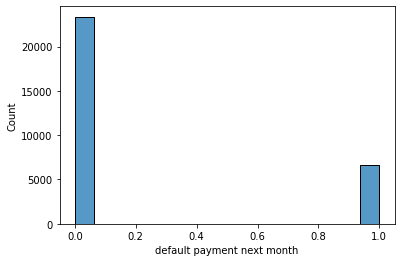

In [65]:
sns.histplot(df['default payment next month'])

(array([2.7590e+03, 5.6860e+03, 1.4737e+04, 3.6880e+03, 2.6670e+03,
        3.2200e+02, 7.6000e+01, 2.6000e+01, 1.1000e+01, 2.8000e+01]),
 array([-2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 <a list of 10 Patch objects>)

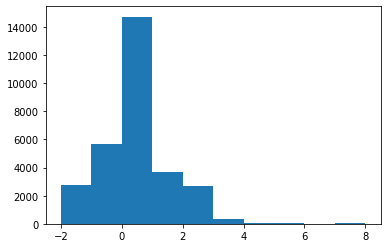

In [56]:
plt.hist(df.pp_sep)

(array([3.782e+03, 6.050e+03, 1.573e+04, 2.800e+01, 3.927e+03, 3.260e+02,
        9.900e+01, 2.500e+01, 1.200e+01, 2.100e+01]),
 array([-2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 <a list of 10 Patch objects>)

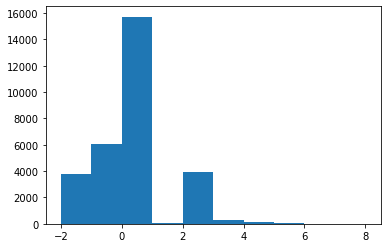

In [55]:
plt.hist(df.pp_aug)

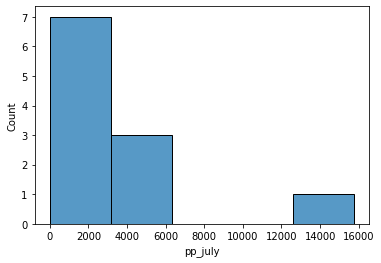

In [50]:
sns.histplot(df.pp_july.value_counts())

(array([4.0850e+03, 5.9380e+03, 1.5764e+04, 4.0000e+00, 3.8190e+03,
        2.4000e+02, 7.6000e+01, 2.1000e+01, 2.3000e+01, 3.0000e+01]),
 array([-2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 <a list of 10 Patch objects>)

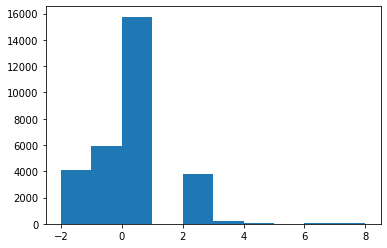

In [54]:
plt.hist(df.pp_july)

(array([4.3480e+03, 5.6870e+03, 1.6455e+04, 2.0000e+00, 3.1590e+03,
        1.8000e+02, 6.9000e+01, 3.5000e+01, 5.0000e+00, 6.0000e+01]),
 array([-2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 <a list of 10 Patch objects>)

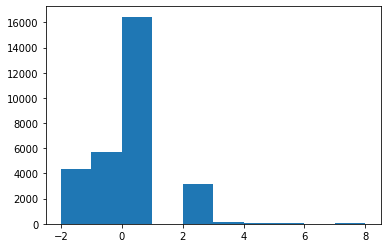

In [57]:
plt.hist(df.pp_june)

(array([4.5460e+03, 5.5390e+03, 1.6947e+04, 0.0000e+00, 2.6260e+03,
        1.7800e+02, 8.4000e+01, 1.7000e+01, 4.0000e+00, 5.9000e+01]),
 array([-2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 <a list of 10 Patch objects>)

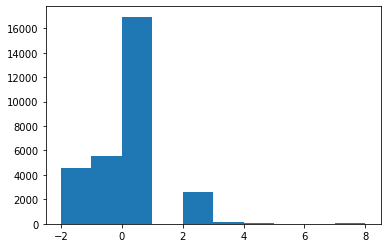

In [58]:
plt.hist(df.pp_may)

(array([4.8950e+03, 5.7400e+03, 1.6286e+04, 0.0000e+00, 2.7660e+03,
        1.8400e+02, 4.9000e+01, 1.3000e+01, 1.9000e+01, 4.8000e+01]),
 array([-2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 <a list of 10 Patch objects>)

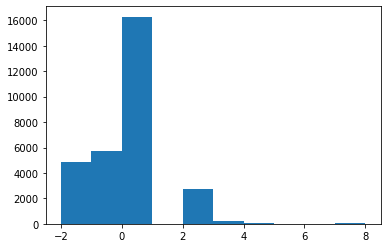

In [59]:
plt.hist(df.pp_april)

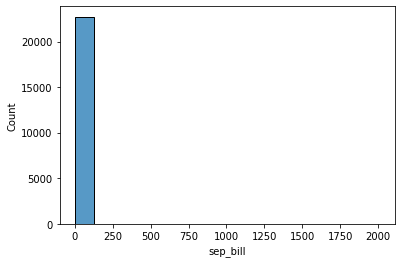

In [69]:
df.sep_bill.value_counts()

0        2008
390       244
780        76
326        72
316        63
         ... 
12466       1
98874       1
2619        1
14909       1
44984       1
Name: sep_bill, Length: 22723, dtype: int64

In [71]:
df.sep_paid_amt.value_counts()

0        5249
2000     1363
3000      891
5000      698
1500      507
         ... 
24125       1
20031       1
9019        1
11066       1
10850       1
Name: sep_paid_amt, Length: 7943, dtype: int64

In [72]:
sum(df.sep_bill)

1536699927

In [73]:
sum(df.sep_paid_amt)

169907415